In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = make_blobs(n_samples=100 , n_features=3 , centers = 2 , random_state=101)

In [8]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [10]:
scale = MinMaxScaler()
scaled_data = scale.fit_transform(data[0])

In [11]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [12]:
from mpl_toolkits.mplot3d import Axes3D

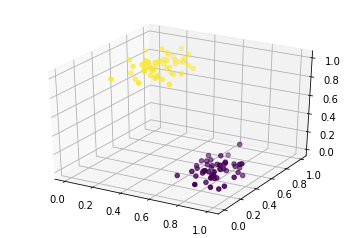

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(data_x,data_y , data_z , c = data[1])

In [14]:
from tensorflow.contrib.layers import fully_connected

In [25]:
inp = 3
hidden = 2
out = inp
lr = 0.01

In [26]:
X = tf.placeholder(tf.float32,shape = [None,inp])

In [27]:
hidden = fully_connected(X , hidden , activation_fn=None)
out_layer = fully_connected(hidden , num_outputs=out , activation_fn=None)

In [28]:
loss = tf.reduce_mean(tf.square(out_layer - X))

In [29]:
opt = tf.train.AdamOptimizer(lr)
train = opt.minimize(loss)

In [30]:
init = tf.global_variables_initializer()

steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(steps):
        
        sess.run(train , feed_dict = {X:scaled_data})
        
    hidden_out = hidden.eval(feed_dict={X:scaled_data})
    

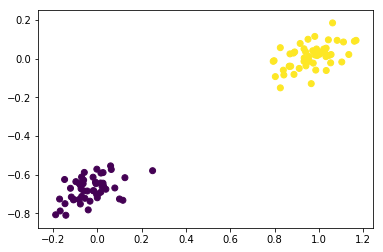

In [31]:
plt.scatter(hidden_out[:,0] ,hidden_out[:,1] , c=data[1])

### In this example : 
### A linear autoencoder was used for dimensionality reduction. 
### Model architecture : Inp_layer ----> Hidden layer -----> output layer
### Inp_layer = output layer
### hidden layer dims(2) < input_layer dims(3)
### Thus, dims reduced at hidden layer
###  Above graph proves that data information safely retained during reduction of dimensions from 3 to 2